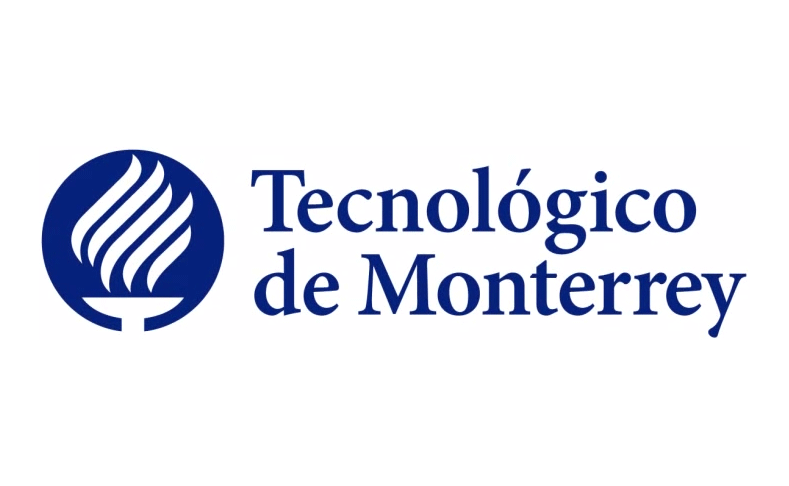

#**Maestría en Inteligencia Artificial Aplicada**

##**Materia:** Proyecto Integrador

**Profesor titular:** Dra. Grettel Barceló Alonso / Dr. Luis Eduardo Falcón Morales

**ASESOR - PROYECTO INTEGRADOR ABR25**  
Dr. Carlos Villaseñor

<br><br>
**Equipo 10**  
David García Robles - A01152606  
David Nava Jiménez - A01168501  
José Antonio Hernández Hernández - A01381334  


#**Carga de librerías y visualización inicial del DataFrame**

In [1]:
!pip install category_encoders


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('C:/Users/david/GitRepo/modelo-ventas-nmp/data/raw/ventas.csv', encoding='iso-8859-1', low_memory=False)

In [4]:

def eliminar_columnas_irrelevantes(df):
    columnas_a_eliminar = [
        'FECHA_EMPEÑO', 'FECHA_COMERCIALIZACION', 'FECHA_HORA_MOV',
        'FECHA_MAX_DEP_RECUP', 'FECHA_CARGA', 'FCH_CARGA',
        'GASTOSOPERACION', 'IVAINTERESDEPOSITO', 'IVAINTERESALMONEDA',
        'IVAGASTOSOPERACION', 'IVA_DESEXT', 'IVACOM_ALMACENAJE',
        'IVACOM_PASECOM', 'IVACOM_EXHIBICION', 'IVAINT_DEPRECUP',
        'INTERES_DEPRECUP', 'CUSTODIA', 'DEMASIA', 'DES_EXT',
        'DESCRIPCION_PARTIDA', 'ORIGEN', 'OPERACION',
        'num_particion'
    ]
    columnas_a_eliminar = [col for col in columnas_a_eliminar if col in df.columns]
    df = df.drop(columns=columnas_a_eliminar)
    print(f"Columnas eliminadas: {columnas_a_eliminar}")
    return df


In [5]:
df = eliminar_columnas_irrelevantes(df)

Columnas eliminadas: ['FECHA_COMERCIALIZACION', 'FECHA_HORA_MOV', 'FECHA_MAX_DEP_RECUP', 'FECHA_CARGA', 'FCH_CARGA', 'GASTOSOPERACION', 'IVAINTERESDEPOSITO', 'IVAINTERESALMONEDA', 'IVAGASTOSOPERACION', 'IVA_DESEXT', 'IVACOM_ALMACENAJE', 'IVACOM_PASECOM', 'IVACOM_EXHIBICION', 'IVAINT_DEPRECUP', 'INTERES_DEPRECUP', 'CUSTODIA', 'DEMASIA', 'DES_EXT', 'DESCRIPCION_PARTIDA', 'ORIGEN', 'OPERACION', 'num_particion']


In [ ]:
df = df[df["RAMO"] == "Alhajas"].copy()                    # Filtrar el dataframe para conservar unicamente los registros correspondientes al ramo "Alhajas"

In [7]:
df.head(5)

,SUCURSAL,ESTADO_SUCURSAL,CLAVE_OPERACION,PARTIDA,GRAMAJE,KILATAJE,AVALUO_COMPLEMENTARIO,FACTOR_HECHURA,FACTOR,VALOR_MONTE,...,TIPO_PRENDA,FECHA_EMPENO_OK,FECHA_HORA_MOV_OK,FECHA_COMERCIALIZACION_OK,SALDO_INSOLUTO,COM_ALMACENAJE,COMPASE_COMERCIALIZACION,COM_EXHIBICION,imp_minusvalia,imp_cancelacion_int
0,1005,CIUDAD DE MÃXICO,VP,181615421,4,14,0,Abollado Ligero / Funcional,F3,0,...,anillo,NaN,NaN,NaN,1309.42,NaN,NaN,NaN,NaN,NaN
1,1005,CIUDAD DE MÃXICO,VP,181616741,NaN,NaN,NaN,NaN,NaN,0,...,anillo,NaN,NaN,NaN,741.19,NaN,NaN,NaN,NaN,NaN
2,1005,CIUDAD DE MÃXICO,VP,181616743,NaN,NaN,NaN,NaN,NaN,0,...,churumbela,NaN,NaN,NaN,1601.76,NaN,NaN,NaN,NaN,NaN
3,16,AGUASCALIENTES,VP,181662772,23.9,10,NaN,Buen Estado Sin Personalizar / Sin Abollar,F4,0,...,collar,NaN,NaN,NaN,0.47,NaN,NaN,NaN,NaN,NaN
4,278,CIUDAD DE MÃXICO,VP,181809632,12.4,8,NaN,Personalizado,F2,0,...,otros,NaN,NaN,NaN,0.47,NaN,NaN,NaN,NaN,NaN


In [8]:
#Imprimir número de columnas y número de filas del dataframe
print('Número de filas:', df.shape[0])
print('Número de columnas:', df.shape[1])

Número de filas: 995355
Número de columnas: 42


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995355 entries, 0 to 1048574
Data columns (total 42 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SUCURSAL                   995354 non-null  object 
 1   ESTADO_SUCURSAL            995355 non-null  object 
 2   CLAVE_OPERACION            995355 non-null  object 
 3   PARTIDA                    995355 non-null  object 
 4   GRAMAJE                    941185 non-null  object 
 5   KILATAJE                   866285 non-null  object 
 6   AVALUO_COMPLEMENTARIO      915556 non-null  object 
 7   FACTOR_HECHURA             941185 non-null  object 
 8   FACTOR                     941185 non-null  object 
 9   VALOR_MONTE                995355 non-null  object 
 10  VALOR_MONTE_ACTUALIZADO    845982 non-null  object 
 11  AVALUO_COMERCIAL           933861 non-null  object 
 12  PRESTAMO                   995355 non-null  object 
 13  PRECIO_VENTA_INICIAL       995355

**Interpretaciones**

Revisando a detalle los datos, identificamos que hay columnas que no contienen información, estas son las siguientes: AVALUO_COMPLEMENTARIO, GASTOSOPERACION, IVAINTERESDEPOSITO, IVAINTERESALMONEDA, IVAGASTOSOPERACION, IVA_DESEXT, FECHA_EMPENO_OK, FECHA_HORA_MOV_OK, FECHA_COMERCIALIZACION_OK, CUSTODIA, COM_ALMACENAJE, IVACOM_ALMACENAJE, COMPASE_COMERCIALIZACION, IVACOM_PASECOM, IVACOM_EXHIBICION, INTERES_DEPRECUP, IVAINT_DEPRECUP, imp_minusvalia, imp_cancelacion_int. Las cuales vamos a eliminar del dataset con la función drop de pandas

In [10]:
columnas_irrelevantes = [
    'AVALUO_COMPLEMENTARIO', 'GASTOSOPERACION', 'IVAINTERESDEPOSITO', 'IVAINTERESALMONEDA',
    'IVAGASTOSOPERACION', 'IVA_DESEXT', 'FECHA_EMPENO_OK', 'FECHA_HORA_MOV_OK',
    'FECHA_COMERCIALIZACION_OK', 'CUSTODIA', 'COM_ALMACENAJE', 'IVACOM_ALMACENAJE',
    'COMPASE_COMERCIALIZACION', 'IVACOM_PASECOM', 'IVACOM_EXHIBICION',
    'INTERES_DEPRECUP', 'IVAINT_DEPRECUP', 'imp_minusvalia', 'imp_cancelacion_int'
]

df.drop(columns=columnas_irrelevantes, axis=1, inplace=True, errors='ignore')

In [11]:
df.head(5)

,SUCURSAL,ESTADO_SUCURSAL,CLAVE_OPERACION,PARTIDA,GRAMAJE,KILATAJE,FACTOR_HECHURA,FACTOR,VALOR_MONTE,VALOR_MONTE_ACTUALIZADO,...,IMPORTE_VENTA,PRODUCTO,TASA_OFERTA,CANAL,DIAS_ALMONEDA,RANGO_DIAS_ALMONEDA,PRECIO_VENTA_FINAL_SID,TIPO_PRENDA,SALDO_INSOLUTO,COM_EXHIBICION
0,1005,CIUDAD DE MÃXICO,VP,181615421,4,14,Abollado Ligero / Funcional,F3,0,NaN,...,1692,CL,3.5,Aprovechamiento Institucion,31,31-60,1309.42,anillo,1309.42,NaN
1,1005,CIUDAD DE MÃXICO,VP,181616741,NaN,NaN,NaN,NaN,0,NaN,...,1221.53,CL,3.5,Aprovechamiento Institucion,31,31-60,741.19,anillo,741.19,NaN
2,1005,CIUDAD DE MÃXICO,VP,181616743,NaN,NaN,NaN,NaN,0,NaN,...,2115,CL,3.5,Aprovechamiento Institucion,31,31-60,1601.76,churumbela,1601.76,NaN
3,16,AGUASCALIENTES,VP,181662772,23.9,10,Buen Estado Sin Personalizar / Sin Abollar,F4,0,NaN,...,7149.64,CL,4.85,Anticipado Ventanilla,29,dic-30,0.47,collar,0.47,NaN
4,278,CIUDAD DE MÃXICO,VP,181809632,12.4,8,Personalizado,F2,0,NaN,...,1645,CL,4.85,Anticipado Ventanilla,21,dic-30,0.47,otros,0.47,NaN


In [12]:
print('Número de filas:', df.shape[0])                                             #Imprimir número de columnas y número de filas del dataframe posterior a esta primer limpieza
print('Número de columnas:', df.shape[1])

Número de filas: 995355
Número de columnas: 34


In [13]:
print(df.columns.tolist())

['SUCURSAL', 'ESTADO_SUCURSAL', 'CLAVE_OPERACION', 'PARTIDA', 'GRAMAJE', 'KILATAJE', 'FACTOR_HECHURA', 'FACTOR', 'VALOR_MONTE', 'VALOR_MONTE_ACTUALIZADO', 'AVALUO_COMERCIAL', 'PRESTAMO', 'PRECIO_VENTA_INICIAL', 'PRECIO_VENTA_FINAL', 'FECHA_EMPENO', 'VALOR_ANCLA_ORO', 'RAMO', 'SUBRAMO', 'REFRENDOS_REALIZADOS', 'INCREMENTO', 'DESPLAZAMIENTO_COMERCIAL', 'VALUADOR', 'INTERES', 'INTERESALMONEDA', 'IMPORTE_VENTA', 'PRODUCTO', 'TASA_OFERTA', 'CANAL', 'DIAS_ALMONEDA', 'RANGO_DIAS_ALMONEDA', 'PRECIO_VENTA_FINAL_SID', 'TIPO_PRENDA', 'SALDO_INSOLUTO', 'COM_EXHIBICION']


Adicional, encontramos instancias que no tienen valores (NaN) dentro del dataset, por lo que también eliminamos las instancias que tienen al menos 5 valores no nulos

In [14]:
df = df.dropna(thresh=5)                                                          # Mantiene filas con al menos 10 valores no nulos


In [15]:
print('Número de filas:', df.shape[0])                                            #Imprimir número de columnas y número de filas del dataframe posterior a esta primer limpieza
print('Número de columnas:', df.shape[1])

Número de filas: 995355
Número de columnas: 34


Vemos que se redujeron el número de columnas y el número de filas en 18 y 25 respectivamente

#**Valores Faltantes**

In [16]:
df.isnull().sum()*100/len(df)

SUCURSAL                     0.000100
ESTADO_SUCURSAL              0.000000
CLAVE_OPERACION              0.000000
PARTIDA                      0.000000
GRAMAJE                      5.442279
KILATAJE                    12.967233
FACTOR_HECHURA               5.442279
FACTOR                       5.442279
VALOR_MONTE                  0.000000
VALOR_MONTE_ACTUALIZADO     15.007008
AVALUO_COMERCIAL             6.178097
PRESTAMO                     0.000000
PRECIO_VENTA_INICIAL         0.000000
PRECIO_VENTA_FINAL           0.000000
FECHA_EMPENO                 0.000000
VALOR_ANCLA_ORO             15.007008
RAMO                         0.000000
SUBRAMO                      0.000000
REFRENDOS_REALIZADOS         0.000000
INCREMENTO                  13.896951
DESPLAZAMIENTO_COMERCIAL    13.896951
VALUADOR                     2.813067
INTERES                      2.972608
INTERESALMONEDA             14.545665
IMPORTE_VENTA                0.000000
PRODUCTO                     0.000000
TASA_OFERTA 

**Interpretaciones**

Posterior a la eliminación de columnas y filas, todavía podemos observar que las columnas COM_EXHIBICION y FECHA_MAX_DEP_RECUP tienen el 71% y 36% de valores faltantes, por lo que procedemos a eliminar las columnas. Adicional, la columna num_particion se deriva de la columna FECHA_CARGA por lo que también se procede a eliminar.

In [17]:
df.drop(['COM_EXHIBICION', 'FECHA_MAX_DEP_RECUP', 'num_particion'], axis=1, inplace=True, errors='ignore')


In [18]:
                                                                                  #Imprimir número de columnas y número de filas del dataframe posterior a esta primer limpieza
print('Número de filas:', df.shape[0])
print('Número de columnas:', df.shape[1])

Número de filas: 995355
Número de columnas: 33


In [19]:
df.isnull().sum()*100/len(df)

SUCURSAL                     0.000100
ESTADO_SUCURSAL              0.000000
CLAVE_OPERACION              0.000000
PARTIDA                      0.000000
GRAMAJE                      5.442279
KILATAJE                    12.967233
FACTOR_HECHURA               5.442279
FACTOR                       5.442279
VALOR_MONTE                  0.000000
VALOR_MONTE_ACTUALIZADO     15.007008
AVALUO_COMERCIAL             6.178097
PRESTAMO                     0.000000
PRECIO_VENTA_INICIAL         0.000000
PRECIO_VENTA_FINAL           0.000000
FECHA_EMPENO                 0.000000
VALOR_ANCLA_ORO             15.007008
RAMO                         0.000000
SUBRAMO                      0.000000
REFRENDOS_REALIZADOS         0.000000
INCREMENTO                  13.896951
DESPLAZAMIENTO_COMERCIAL    13.896951
VALUADOR                     2.813067
INTERES                      2.972608
INTERESALMONEDA             14.545665
IMPORTE_VENTA                0.000000
PRODUCTO                     0.000000
TASA_OFERTA 

Vamos a revisar ahora las columnas con el porcentaje de valores faltantes

In [20]:
per_miss_col = df.isna().mean() * 100
missing = pd.DataFrame(per_miss_col)
missing.columns = ['Percentage of missing values (%)']
missing

,Percentage of missing values (%)
SUCURSAL,0.000100
ESTADO_SUCURSAL,0.000000
CLAVE_OPERACION,0.000000
PARTIDA,0.000000
GRAMAJE,5.442279
KILATAJE,12.967233
FACTOR_HECHURA,5.442279
FACTOR,5.442279
VALOR_MONTE,0.000000
VALOR_MONTE_ACTUALIZADO,15.007008


#**Asignación de tipo de dato a cada variable**

Un punto importante a destacar es que el tipo de dato de cada columna, está por default como "objeto", lo que haremos a continuación será asignar el tipo de datos que está de acuerdo con la naturaleza correcta de los datos y de acuerdo con el negocio

In [21]:
                                                                                   #Diccionario con columnas y tipo de dato correcto
dicc = {
    'SUCURSAL': 'str',
    'ESTADO_SUCURSAL': 'str',
    'CLAVE_OPERACION': 'str',
    'OPERACION': 'str',
    'PARTIDA': 'str',
    'ORIGEN': 'str',
    'DESCRIPCION_PARTIDA': 'str',
    'GRAMAJE': 'float',
    'KILATAJE': 'str',
    'FACTOR_HECHURA': 'str',
    'FACTOR': 'str',
    'VALOR_MONTE': 'float',
    'VALOR_MONTE_ACTUALIZADO': 'float',
    'AVALUO_COMERCIAL': 'float',
    'PRESTAMO': 'float',
    'PRECIO_VENTA_INICIAL': 'float',
    'PRECIO_VENTA_FINAL': 'float',
    'FECHA_EMPENO': 'datetime',
    'FECHA_COMERCIALIZACION': 'datetime',
    'VALOR_ANCLA_ORO': 'float',
    'RAMO': 'str',
    'SUBRAMO': 'str',
    'REFRENDOS_REALIZADOS': 'float',
    'INCREMENTO': 'int',
    'DESPLAZAMIENTO_COMERCIAL': 'int',
    'VALUADOR': 'str',
    'FECHA_HORA_MOV': 'datetime',
    'DEMASIA':'float',
    'INTERES':'float',
    'INTERESALMONEDA':'float',
    'DES_EXT':'float',
    'IMPORTE_VENTA':'float',
    'PRODUCTO':'str',
    'TASA_OFERTA':'float',
    'CANAL':'str',
    'DIAS_ALMONEDA': 'float',
    'RANGO_DIAS_ALMONEDA': 'str',
    'PRECIO_VENTA_FINAL_SID': 'float',
    'TIPO_PRENDA': 'str',
    'FCH_CARGA': 'datetime',
    'SALDO_INSOLUTO': 'float',
    'FECHA_CARGA': 'datetime'
}

In [22]:
for col, tipo in dicc.items():
    if col not in df.columns:
        continue  # Saltar a la siguiente columna

    if tipo in ['int', 'float']:
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except ValueError:
            print(f"No se pudo convertir '{col}' a {tipo}.")  

    elif tipo == 'datetime':
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')
        except ValueError:
            print(f" No se pudo convertir '{col}' a datetime.")  

    else:
        try:
            df[col] = df[col].astype(tipo)
        except Exception as e:
            print(f" Error al convertir '{col}' a {tipo}: {e}")
            

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995355 entries, 0 to 1048574
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SUCURSAL                  995355 non-null  object        
 1   ESTADO_SUCURSAL           995355 non-null  object        
 2   CLAVE_OPERACION           995355 non-null  object        
 3   PARTIDA                   995355 non-null  object        
 4   GRAMAJE                   941185 non-null  float64       
 5   KILATAJE                  995355 non-null  object        
 6   FACTOR_HECHURA            995355 non-null  object        
 7   FACTOR                    995355 non-null  object        
 8   VALOR_MONTE               995355 non-null  float64       
 9   VALOR_MONTE_ACTUALIZADO   845982 non-null  float64       
 10  AVALUO_COMERCIAL          933861 non-null  float64       
 11  PRESTAMO                  995355 non-null  float64       
 12  PRECIO

Vamos a revisar los valores únicos por columna

In [24]:
df.nunique()

SUCURSAL                       311
ESTADO_SUCURSAL                 34
CLAVE_OPERACION                  3
PARTIDA                     984463
GRAMAJE                       4315
KILATAJE                        11
FACTOR_HECHURA                  18
FACTOR                          21
VALOR_MONTE                  37300
VALOR_MONTE_ACTUALIZADO      37393
AVALUO_COMERCIAL             41581
PRESTAMO                     24068
PRECIO_VENTA_INICIAL         38524
PRECIO_VENTA_FINAL           40959
FECHA_EMPENO                   565
VALOR_ANCLA_ORO               1406
RAMO                             1
SUBRAMO                         10
REFRENDOS_REALIZADOS            11
INCREMENTO                      24
DESPLAZAMIENTO_COMERCIAL        15
VALUADOR                       803
INTERES                     135541
INTERESALMONEDA              92420
IMPORTE_VENTA                40957
PRODUCTO                         9
TASA_OFERTA                     68
CANAL                           14
DIAS_ALMONEDA       

#Imputación de datos perdidos o inexistentes

In [25]:
numeric_feat =df.select_dtypes(include=['int64', 'float64']).columns            # seleccionamos las columnas con tipo de dato numérico
cat_var_feat = df.select_dtypes(include=['object']).columns                     # seleccionamos las columns con tipo de dato categórico

df[numeric_feat] = df[numeric_feat].apply(lambda x: x.fillna(x.median()))       # en las variables numéricas decidimos aplicar la imputación de mediana, ya que las distribuciones están sesgadas a la izquierda mayormente
df[cat_var_feat] = df[cat_var_feat].apply(lambda x: x.fillna(x.mode()[0]))      # decidimos aplicar imputación de moda a las variables categóricas

In [26]:
df.isnull().sum()*100/len(df)

SUCURSAL                     0.000000
ESTADO_SUCURSAL              0.000000
CLAVE_OPERACION              0.000000
PARTIDA                      0.000000
GRAMAJE                      0.000000
KILATAJE                     0.000000
FACTOR_HECHURA               0.000000
FACTOR                       0.000000
VALOR_MONTE                  0.000000
VALOR_MONTE_ACTUALIZADO      0.000000
AVALUO_COMERCIAL             0.000000
PRESTAMO                     0.000000
PRECIO_VENTA_INICIAL         0.000000
PRECIO_VENTA_FINAL           0.000000
FECHA_EMPENO                60.771383
VALOR_ANCLA_ORO              0.000000
RAMO                         0.000000
SUBRAMO                      0.000000
REFRENDOS_REALIZADOS         0.000000
INCREMENTO                   0.000000
DESPLAZAMIENTO_COMERCIAL     0.000000
VALUADOR                     0.000000
INTERES                      0.000000
INTERESALMONEDA              0.000000
IMPORTE_VENTA                0.000000
PRODUCTO                     0.000000
TASA_OFERTA 

In [ ]:

                                                                                 # Eliminación de outliers con método IQR
variables = [
    "GRAMAJE", "VALOR_MONTE", "VALOR_MONTE_ACTUALIZADO",
    "AVALUO_COMERCIAL", "PRESTAMO", "PRECIO_VENTA_INICIAL", "INTERESALMONEDA"
]

df_iqr_filtered = df.copy()                                                       # Se crea una copia del DataFrame original para preservar los datos sin modificar
for var in variables:                                                             # Aplicar el método IQR para cada variable
    q1 = df_iqr_filtered[var].quantile(0.25)
    q3 = df_iqr_filtered[var].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df_iqr_filtered = df_iqr_filtered[(df_iqr_filtered[var] >= lower) & (df_iqr_filtered[var] <= upper)]    # Filtrar valores dentro del rango permitido

df = df_iqr_filtered.copy()                                                                                 # Reasignar el DataFrame limpio a la variable principal
print("Shape after IQR filtering:", df.shape)

Shape after IQR filtering: (672019, 33)


#**Evaluación de correlaciones entre variables numéricas**

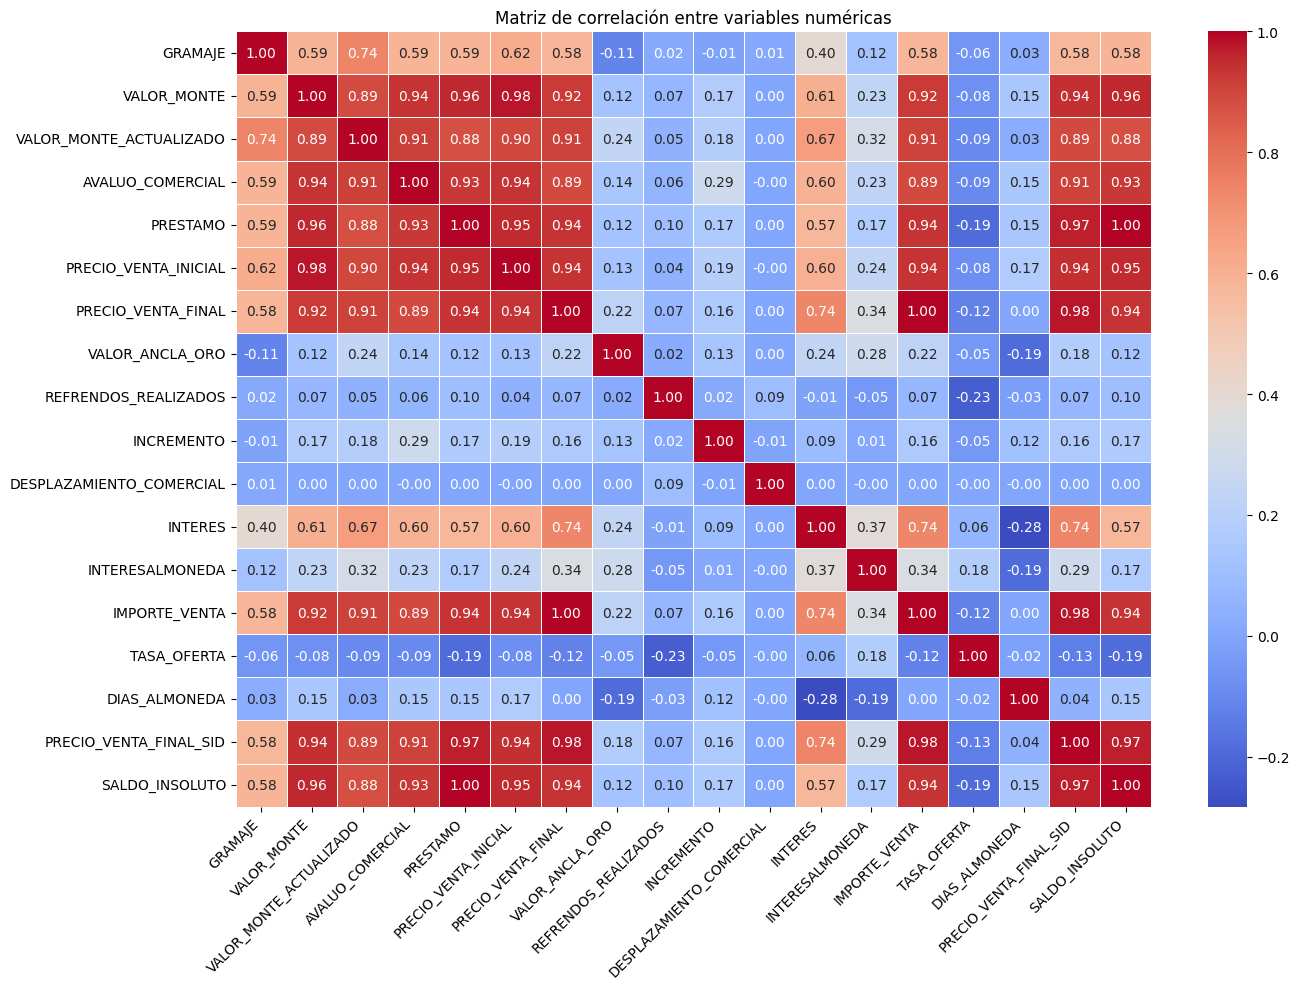

In [28]:
df_numericas = df.select_dtypes(include=['number'])                                                                     # Selecciona solo las columnas numericas

correlation_matrix = df_numericas.corr()                                                                                # Calcula la matriz de correlación



plt.figure(figsize=(14, 10))                                                                                            # Ajusta tamaño según número de variables
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)                                 # Crea el mapa de calor
plt.title("Matriz de correlación entre variables numéricas")                                                            # Título
plt.xticks(rotation=45, ha='right')                                                                                     # Rotación de etiquetas
plt.yticks(rotation=0)                                                                                                  # Rotación de etiquetas
plt.tight_layout()                                                                                                      # Ajusta el espaciado
plt.show()

In [29]:
df_numericas = df.select_dtypes(include=['number'])
corr = df_numericas.corr()                                                                                                    # Calcular la matriz de correlación

correlation_threshold = 0.8                                                                                                   # Umbral de correlación


positive_correlations = corr[corr > correlation_threshold].stack().reset_index()                                              # Extraer los pares de variables con correlaciones mayor al umbral
positive_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']                                                   # Renombrar las columnas del resultado
positive_correlations = positive_correlations[positive_correlations['Variable 1'] != positive_correlations['Variable 2']]     # Eliminar correlaciones redundatnes entre la misma variable

negative_correlations = corr[corr < -correlation_threshold].stack().reset_index()                                             # Extraer solo los pares de variables con correlacion menor que el umbral negativo
negative_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']
negative_correlations = negative_correlations[negative_correlations['Variable 1'] != negative_correlations['Variable 2']]     # Eliminar autocorrelaciones

print("Correlaciones Positivas Fuertes (> 0.8):")                                                                             # Imprime las correlaciones positivas y negativas
print(positive_correlations.sort_values(by='Correlation', ascending=False))

print("\ Correlaciones Negativas Fuertes (< -0.8):")
print(negative_correlations.sort_values(by='Correlation', ascending=True))

Correlaciones Positivas Fuertes (> 0.8):
                 Variable 1               Variable 2  Correlation
52       PRECIO_VENTA_FINAL            IMPORTE_VENTA     0.999977
66            IMPORTE_VENTA       PRECIO_VENTA_FINAL     0.999977
36                 PRESTAMO           SALDO_INSOLUTO     0.999859
84           SALDO_INSOLUTO                 PRESTAMO     0.999859
5               VALOR_MONTE     PRECIO_VENTA_INICIAL     0.978041
..                      ...                      ...          ...
2               VALOR_MONTE  VALOR_MONTE_ACTUALIZADO     0.886405
13  VALOR_MONTE_ACTUALIZADO                 PRESTAMO     0.875159
29                 PRESTAMO  VALOR_MONTE_ACTUALIZADO     0.875159
82           SALDO_INSOLUTO  VALOR_MONTE_ACTUALIZADO     0.875033
18  VALOR_MONTE_ACTUALIZADO           SALDO_INSOLUTO     0.875033

[72 rows x 3 columns]
\ Correlaciones Negativas Fuertes (< -0.8):
Empty DataFrame
Columns: [Variable 1, Variable 2, Correlation]
Index: []


#**Transformación de variables numéricas**

Nuestra variable de salida u objetivo se denomina DIAS_ALMONEDA, que son los días que transcurren entre que llega el artículo y la fecha de movimiento (venta). Vamos a observar su distribución

<Axes: xlabel='DIAS_ALMONEDA', ylabel='Count'>

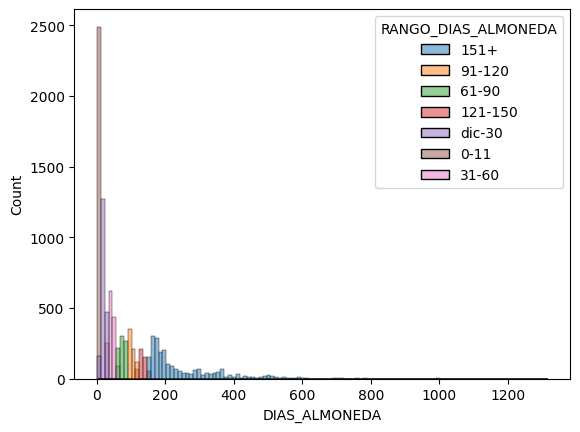

In [30]:
sample_df = df.sample(10000, )                                    # Muestra aleatoria de 10,000 registros
sns.histplot(sample_df, x='DIAS_ALMONEDA', hue='RANGO_DIAS_ALMONEDA')

Podemos visualizar que el rango de la variable objetivo no tiene una distribución normal, y efectivamente gran parte de las observaciones se encuentra en un rango de más de 151 días, lo que nos demuestra la lenta rotación de artículos.

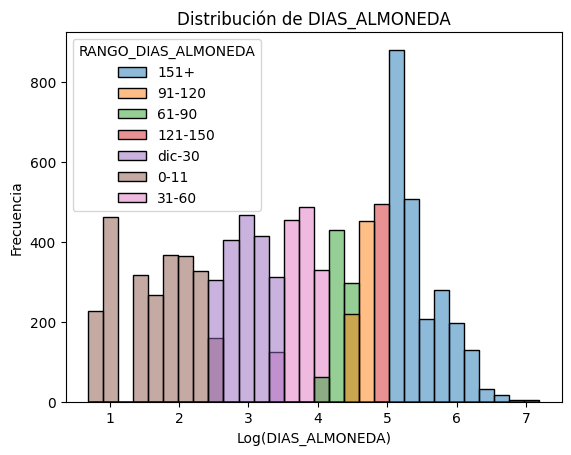

In [31]:
sample_df = sample_df[sample_df['DIAS_ALMONEDA'] >=0]                            # Filtrar solo los valores positivos
sample_df = sample_df.dropna(subset=['DIAS_ALMONEDA'])                           # Eliminar filas con valores faltantes en 'DIAS_ALMONEDA'

sample_df['DIAS_ALMONEDA_LOG'] = np.log1p(sample_df['DIAS_ALMONEDA'])            # Aplicar logaritmo a la columna 'DIAS_ALMONEDA'
sns.histplot(sample_df, x='DIAS_ALMONEDA_LOG', hue='RANGO_DIAS_ALMONEDA')
plt.xlabel('Log(DIAS_ALMONEDA)')                                                  # Etiqueta del eje x
plt.ylabel('Frecuencia')                                                          # Etiqueta del eje y
plt.title('Distribución de DIAS_ALMONEDA')                                        # Título del gráfico
plt.show()

**Justificación del uso de transformación logarítmica en DIAS_ALMONEDA**

La variable DIAS_ALMONEDA representa el número de días que un artículo ha permanecido en inventario, y presenta una distribución altamente sesgada a la derecha, donde la mayoria de los valores se concentran cerca de cero y existen valores extremos mucho mayores. Para abordar el sesgo se aplicó una transformacion logarítmica que reduce el impacto de valores extremos, viendo que la distribución sea más simétrica y adecuada para el modelo.

In [ ]:
#df = df[df[] >= 0]                                                 # Filtrar solo los valores positivos
#df = df.dropna(subset=[])                                          # Eliminar filas con valores faltantes en 'DIAS_ALMONEDA'
#df['DIAS_ALMONEDA_LOG'] = np.log1p(df[])                           # Aplicar transformacion logaritmica al DF procesado


A continuación vamos a revisar las distribuciones de nuestras variables numéricas para revisar si aplica el escalamiento y transformación

In [32]:
num_var_list = ['GRAMAJE','VALOR_MONTE','VALOR_MONTE_ACTUALIZADO','AVALUO_COMERCIAL','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','VALOR_ANCLA_ORO',
                'REFRENDOS_REALIZADOS']


In [33]:
num_var_list_2 = ['INCREMENTO','DESPLAZAMIENTO_COMERCIAL','DEMASIA','INTERES','INTERESALMONEDA','DES_EXT','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID',
                'SALDO_INSOLUTO']

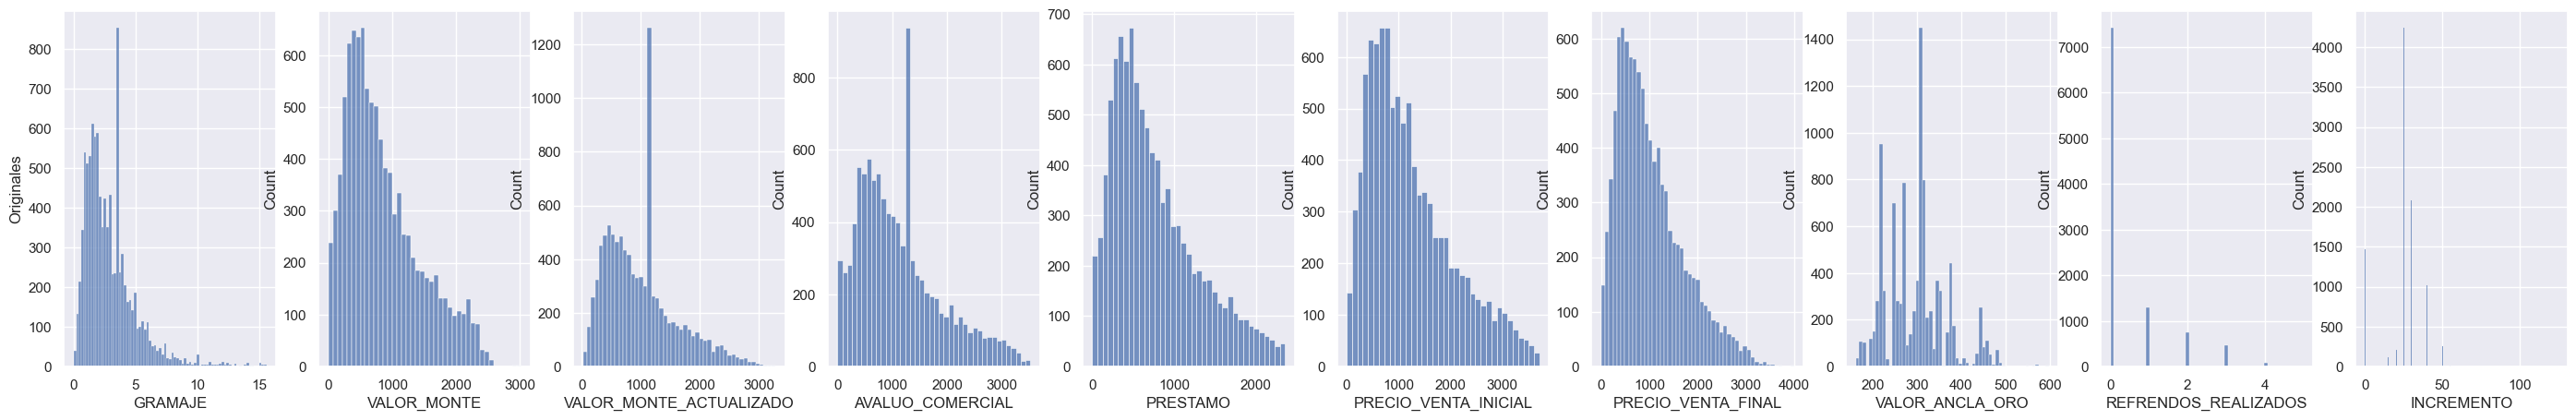

In [34]:
num_var_list = [col for col in sample_df.columns if col in sample_df.select_dtypes(include=np.number)]

sns.set(rc={'figure.figsize':(35,5)})
fig, axes = plt.subplots(1,10)
for k in range(0,10):
# Datos originales
  plt.subplot(1,10, k+1)

  Transf0 = sample_df[num_var_list[k]]
  sns.histplot(Transf0)
  plt.xlabel(num_var_list[k])
  if k == 0:
    plt.ylabel('Originales')

plt.show()

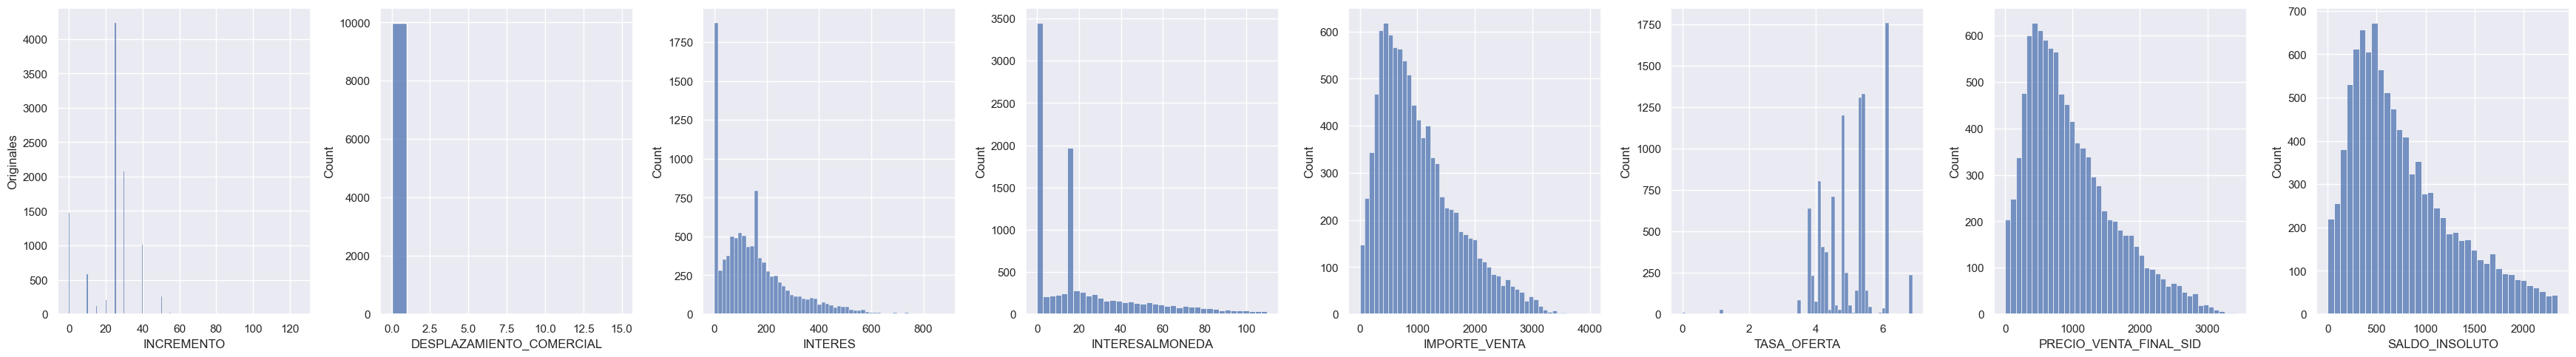

In [35]:
cols_existentes = [col for col in num_var_list_2 if col in sample_df.columns]

# Graficar solo las columnas válidas
sns.set(rc={'figure.figsize': (35, 5)})
fig, axes = plt.subplots(1, len(cols_existentes))

for k in range(len(cols_existentes)):
    plt.subplot(1, len(cols_existentes), k + 1)
    sns.histplot(sample_df[cols_existentes[k]])
    plt.xlabel(cols_existentes[k])
    if k == 0:
        plt.ylabel('Originales')

plt.tight_layout()
plt.show()

Interpretación: Podemos observar que prácticamente todas las variables numéricas cuentan con un sesgo a la izquierda, por lo que primero vamos a aplicar es una transformación  *Yeo-Johnson*,que se puede utilizar en variables con valores cero y negativos, así como valores positivos. Posteriormente aplicaremos un escalamiento Min-Max.

In [36]:
df_1 = df.copy()

# Lista original de variables numéricas a transformar
columnas_transformar = [
    'GRAMAJE','VALOR_MONTE','VALOR_MONTE_ACTUALIZADO',
    'AVALUO_COMERCIAL','PRESTAMO','PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL',
    'VALOR_ANCLA_ORO','REFRENDOS_REALIZADOS','INCREMENTO','DESPLAZAMIENTO_COMERCIAL',
    'DEMASIA','INTERES','INTERESALMONEDA','DES_EXT','IMPORTE_VENTA','TASA_OFERTA',
    'PRECIO_VENTA_FINAL_SID','SALDO_INSOLUTO'
]


columnas_existentes = [col for col in columnas_transformar if col in df_1.columns]
columnas_faltantes = [col for col in columnas_transformar if col not in df_1.columns]


if columnas_faltantes:
    print(" Columnas no encontradas:", columnas_faltantes)


transformer = PowerTransformer(method="yeo-johnson")
transformer.fit(df_1[columnas_existentes])
transf = transformer.transform(df_1[columnas_existentes])

 Columnas no encontradas: ['DEMASIA', 'DES_EXT']


In [37]:
columnas_existentes = [col for col in columnas_transformar if col in df_1.columns]

# Crear el DataFrame transformado con columnas correctas
transf_df = pd.DataFrame(transf, columns=columnas_existentes)

In [38]:
minmax_scale = preprocessing.MinMaxScaler().fit(transf_df[columnas_existentes])
minmax = minmax_scale.transform(transf_df[columnas_existentes])

# Crear el DataFrame escalado
minmax_df = pd.DataFrame(minmax, columns=columnas_existentes)

In [39]:
columnas_originales = [
    'GRAMAJE','VALOR_MONTE','VALOR_MONTE_ACTUALIZADO','AVALUO_COMERCIAL','PRESTAMO',
    'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','VALOR_ANCLA_ORO','REFRENDOS_REALIZADOS','INCREMENTO',
    'DESPLAZAMIENTO_COMERCIAL','DEMASIA','INTERES','INTERESALMONEDA','DES_EXT','IMPORTE_VENTA',
    'TASA_OFERTA','PRECIO_VENTA_FINAL_SID','SALDO_INSOLUTO'
]

columnas_existentes = [col for col in columnas_originales if col in transf_df.columns]

minmax_df = pd.DataFrame(minmax, columns=columnas_existentes)

In [40]:
minmax_df_sample = minmax_df.sample(10000, )

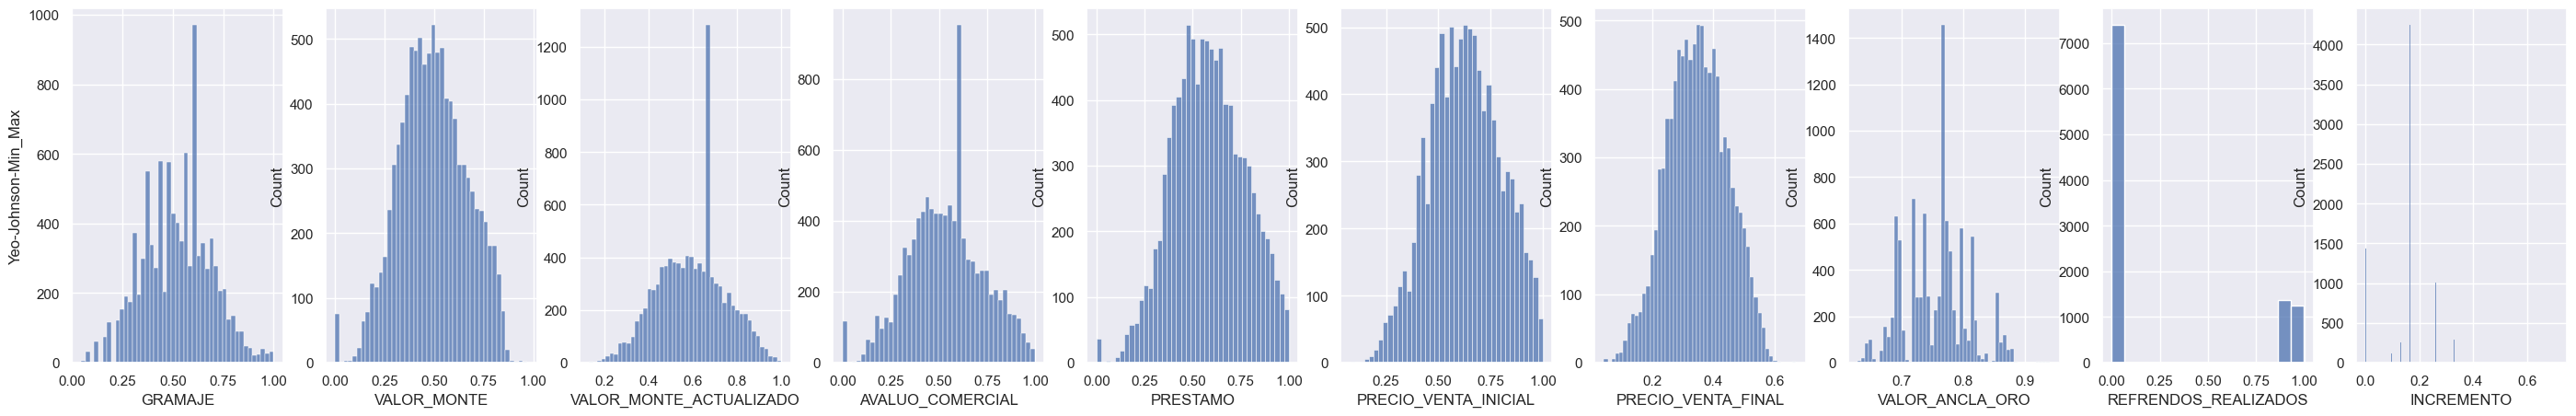

In [41]:
sns.set(rc={'figure.figsize':(35,5)})
fig, axes = plt.subplots(1,10)
for k in range(0,10):
# Datos originales
  plt.subplot(1,10, k+1)

  Transf2 = minmax_df_sample[num_var_list[k]]
  sns.histplot(Transf2)
  plt.xlabel(num_var_list[k])
  if k == 0:
    plt.ylabel('Yeo-Johnson-Min_Max')

plt.show()

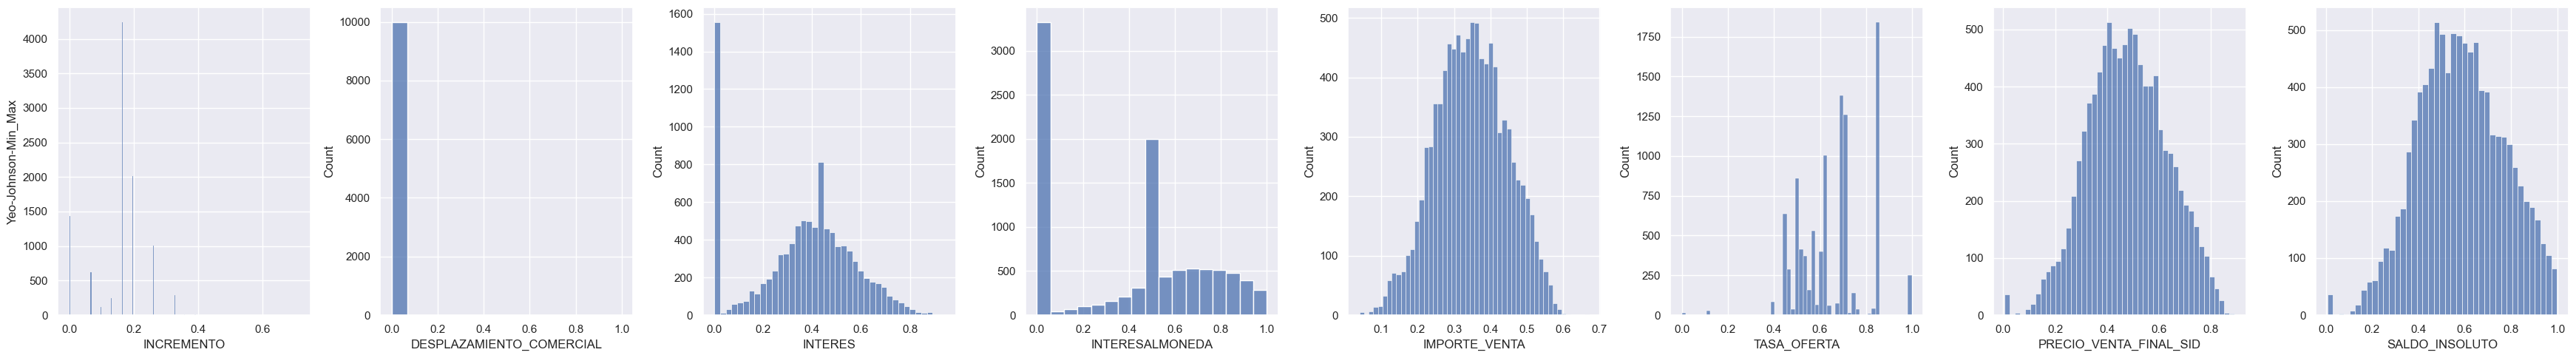

In [42]:
columnas_validas = [col for col in num_var_list_2 if col in minmax_df_sample.columns]


if columnas_validas:
    sns.set(rc={'figure.figsize': (35, 5)})
    fig, axes = plt.subplots(1, len(columnas_validas))
    
    for k, col in enumerate(columnas_validas):
        plt.subplot(1, len(columnas_validas), k + 1)
        sns.histplot(minmax_df_sample[col])
        plt.xlabel(col)
        if k == 0:
            plt.ylabel('Yeo-Johnson-Min_Max')

    plt.tight_layout()
    plt.show()
else:
    print("No hay columnas")

Podemos observar que las distribuciones de las variables numéricas considerando nuestra variable target, son prácticamente normales mayormente.

#**Transformación de variables categóricas**

Antes de iniciar con la transformación de variables categóricas, es importante separar en dos listas las variables con alta cardinalidad y las variables con baja cardinalidad. Vamos a empezar con las de baja cardinalidad

In [43]:
r = df.describe(include=object).T
moda = r['top'].dtype

In [44]:
few_cardinal = r[r['unique'] <= 100].index
few_cardinal_variables = df[few_cardinal]
few_cardinal_variables

,ESTADO_SUCURSAL,CLAVE_OPERACION,KILATAJE,FACTOR_HECHURA,FACTOR,RAMO,SUBRAMO,PRODUCTO,CANAL,RANGO_DIAS_ALMONEDA,TIPO_PRENDA
0,CIUDAD DE MÃXICO,VP,14,Abollado Ligero / Funcional,F3,Alhajas,Alhajas,CL,Aprovechamiento Institucion,31-60,anillo
1,CIUDAD DE MÃXICO,VP,nan,nan,nan,Alhajas,Diamantes,CL,Aprovechamiento Institucion,31-60,anillo
2,CIUDAD DE MÃXICO,VP,nan,nan,nan,Alhajas,Diamantes,CL,Aprovechamiento Institucion,31-60,churumbela
4,CIUDAD DE MÃXICO,VP,8,Personalizado,F2,Alhajas,Alhajas,CL,Anticipado Ventanilla,dic-30,otros
5,CIUDAD DE MÃXICO,VP,14,Rotas y Pedaceria,F1,Alhajas,Alhajas,CL,Anticipado Ventanilla,dic-30,pendiente
...,...,...,...,...,...,...,...,...,...,...,...
1048566,NAYARIT,VP,10,Buen Estado Sin Personalizar / Sin Abollar,F4,Alhajas,Alhajas,CL,Cumplido,dic-30,collar
1048568,SAN LUIS POTOSÃ,VP,nan,nan,nan,Alhajas,Diamantes,CL,Cumplido,dic-30,anillo
1048570,YUCATÃN,VP,10,Buen Estado Sin Personalizar / Sin Abollar,F4,Alhajas,Alhajas,CL,Cumplido,dic-30,pulsera
1048571,PUEBLA,VP,14,Buen Estado Sin Personalizar / Sin Abollar,F4,Alhajas,Alhajas,CL,Cumplido,151+,anillo


Vamos a visualizar, en gráficos de barra la frecuencia de las categorías de las variables con baja cardinalidad

C:\Users\david\AppData\Local\Temp\ipykernel_17816\3341452651.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=60, ha='right', fontsize=8)
C:\Users\david\AppData\Local\Temp\ipykernel_17816\3341452651.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=60, ha='right', fontsize=8)
C:\Users\david\AppData\Local\Temp\ipykernel_17816\3341452651.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=60, ha='right', fontsize=8)
C:\Users\david\AppData\Local\Temp\ipykernel_17816\3341452651.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after s

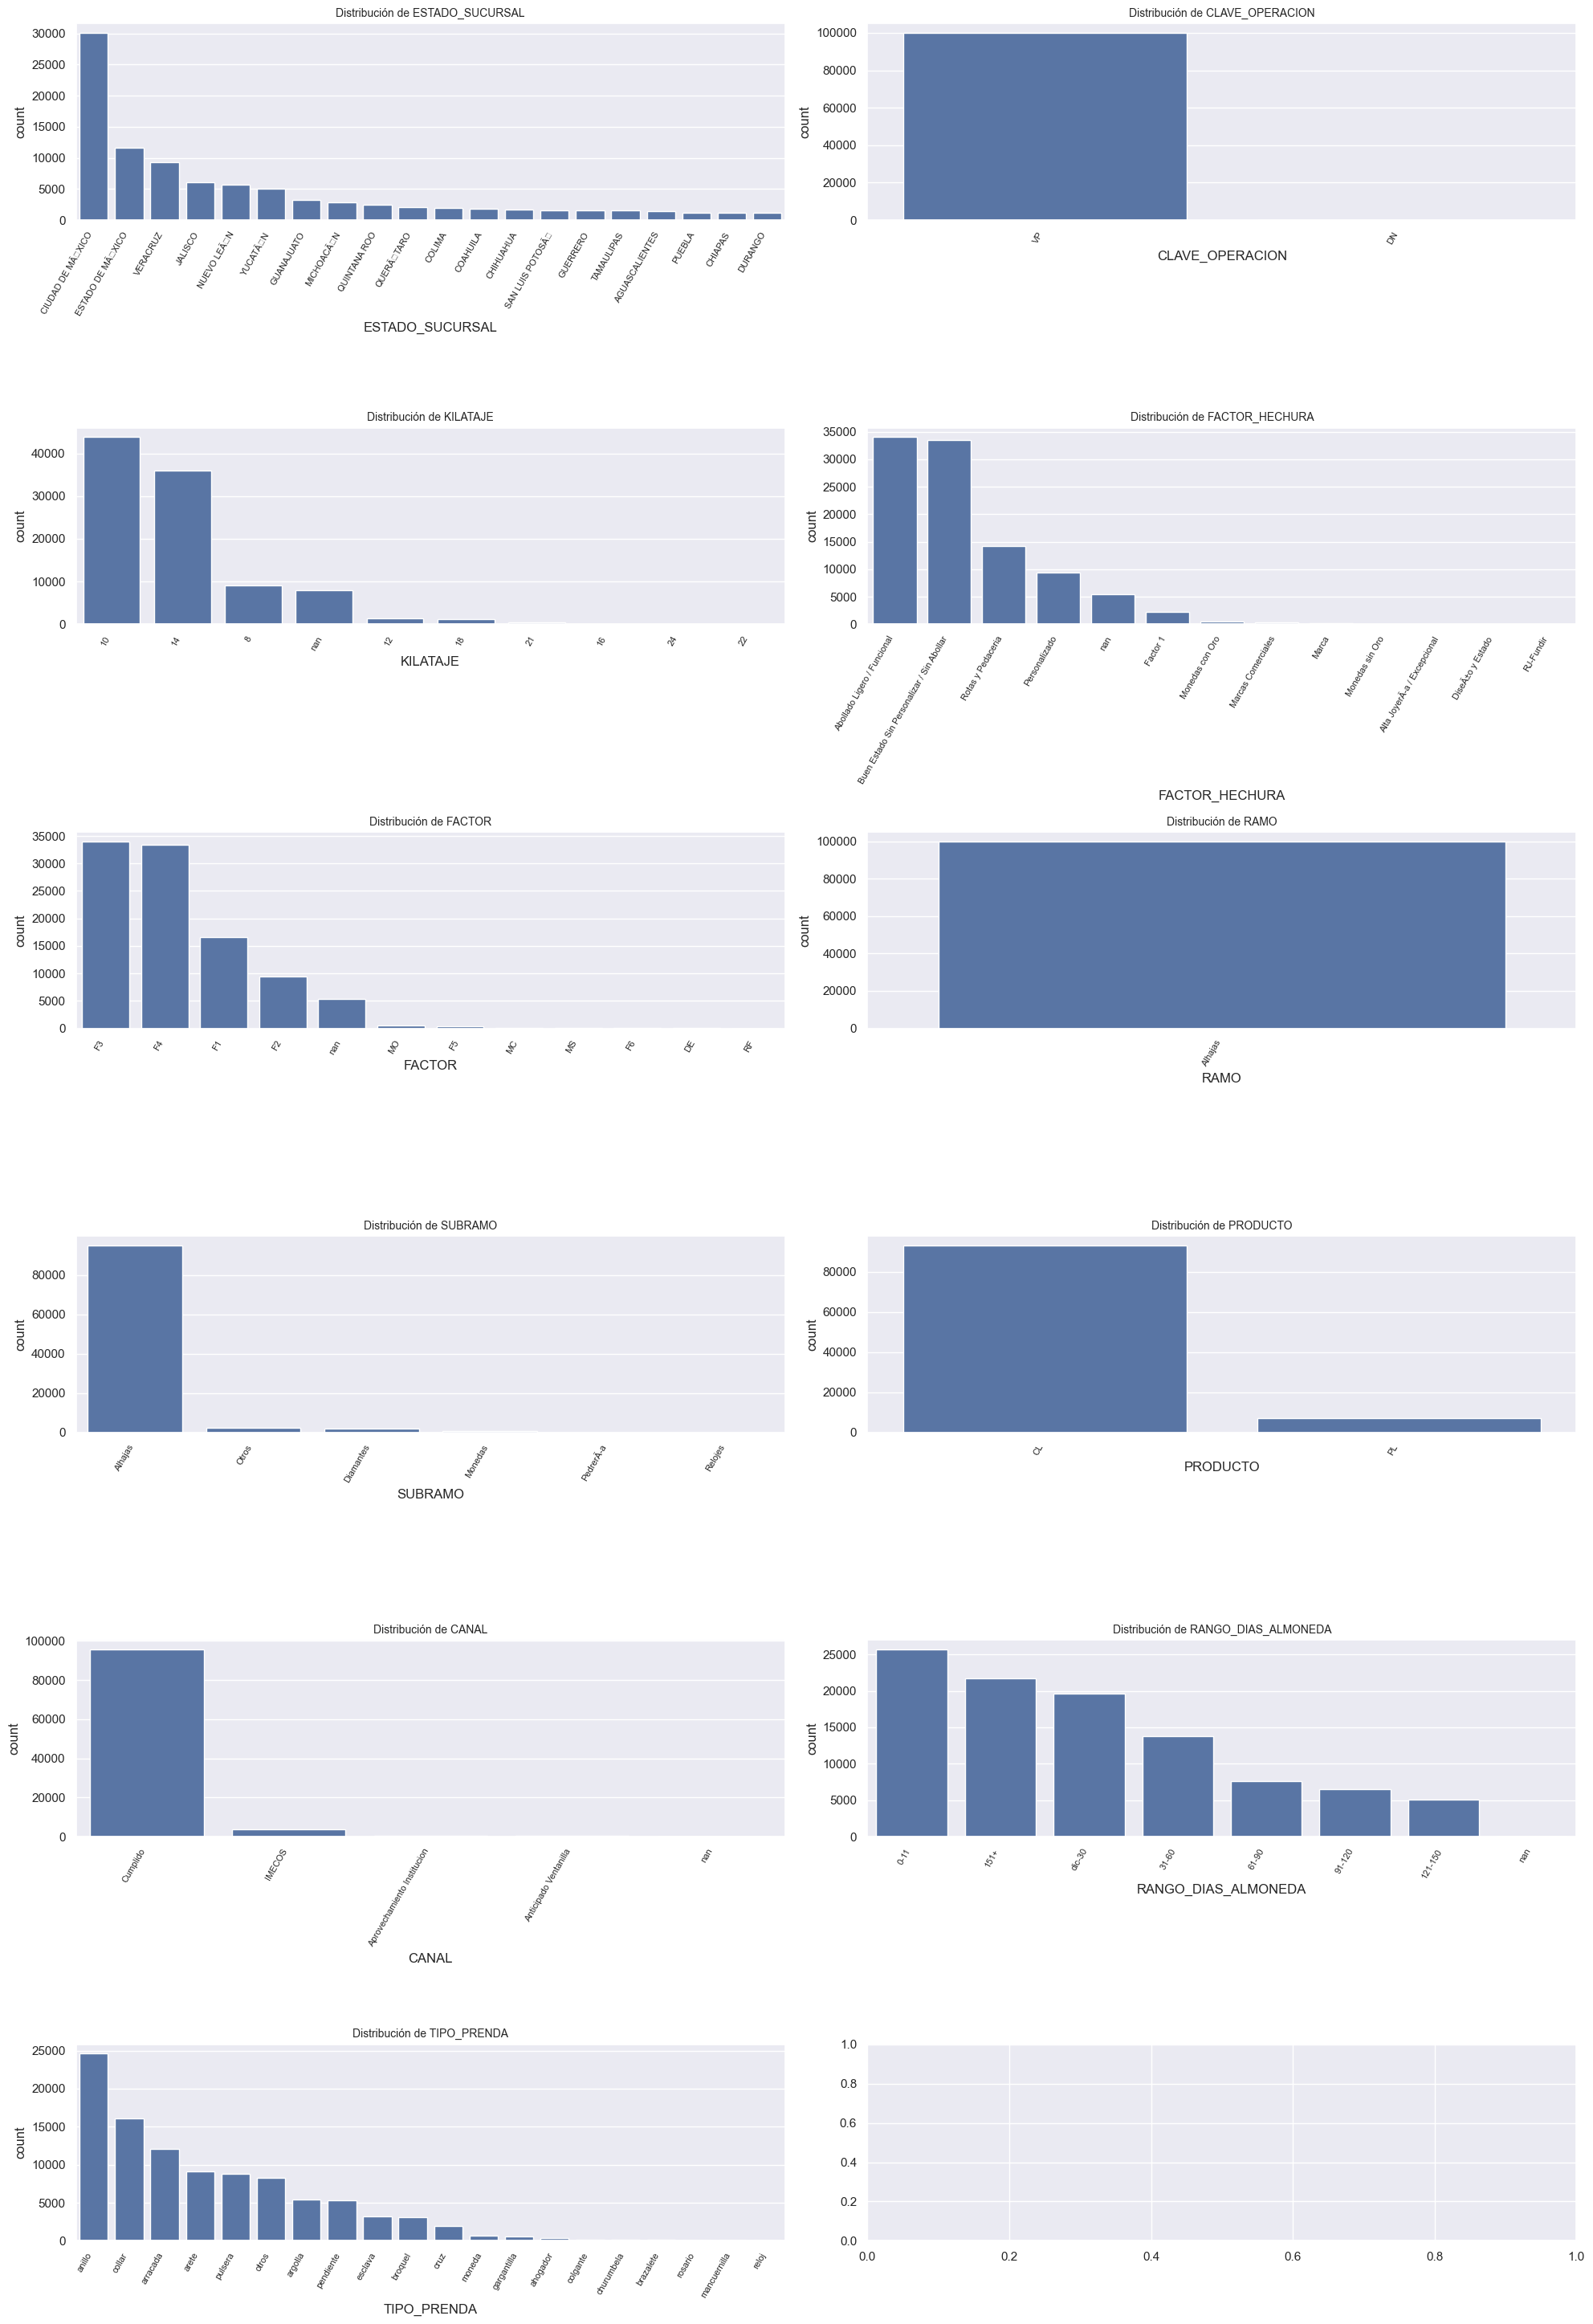

In [45]:
sample_df_2 = df_1.sample(100000, )  # O usa df_filtrado si es el que limpiaste

variables = [
    'ESTADO_SUCURSAL', 'CLAVE_OPERACION', 'OPERACION', 'ORIGEN', 'KILATAJE',
    'FACTOR_HECHURA', 'FACTOR', 'RAMO', 'SUBRAMO', 'PRODUCTO',
    'CANAL', 'RANGO_DIAS_ALMONEDA', 'TIPO_PRENDA'
]


variables_validas = [v for v in variables if v in sample_df_2.columns]


filas = (len(variables_validas) + 1) // 2
fig, axis = plt.subplots(filas, 2, figsize=(20, 5 * filas))
axis = axis.flatten()


for i, var in enumerate(variables_validas):
    ax = axis[i]
    
    top_categories = sample_df_2[var].value_counts().nlargest(20).index
    filtered_data = sample_df_2[sample_df_2[var].isin(top_categories)]

    plot = sns.countplot(x=var, data=filtered_data, ax=ax, order=top_categories)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=60, ha='right', fontsize=8)
    ax.set_title(f'Distribución de {var}', fontsize=10)


plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



Posteriormente vamos a aplicar la codificación *one hot a las variables de baja cardinalidad. Consideremos que esta codificación agrega más columnas al dataset por cada valor único. En nuestro caso tenemos más variables con baja cardinalidad que alta cardinalidad

In [46]:
encoder = OneHotEncoder(drop='first',sparse_output=False)
encoded_data = encoder.fit_transform(few_cardinal_variables)

In [47]:
onehot_df = pd.DataFrame(encoded_data)
onehot_df.columns = encoder.get_feature_names_out()
onehot_df

,ESTADO_SUCURSAL_BAJA CALIFORNIA NORTE,ESTADO_SUCURSAL_BAJA CALIFORNIA SUR,ESTADO_SUCURSAL_CAMPECHE,ESTADO_SUCURSAL_CHIAPAS,ESTADO_SUCURSAL_CHIHUAHUA,ESTADO_SUCURSAL_CIUDAD DE MÃXICO,ESTADO_SUCURSAL_COAHUILA,ESTADO_SUCURSAL_COLIMA,ESTADO_SUCURSAL_DURANGO,ESTADO_SUCURSAL_ESTADO DE MÃXICO,...,TIPO_PRENDA_moneda,TIPO_PRENDA_nan,TIPO_PRENDA_otros,TIPO_PRENDA_pendiente,TIPO_PRENDA_pluma,TIPO_PRENDA_pulsera,TIPO_PRENDA_reloj,TIPO_PRENDA_rosario,TIPO_PRENDA_telÃ©fono,TIPO_PRENDA_violador
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
672017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Posteriormente vamos a aplicar codificación binaria a las variables con alta cardinalidad, la transformación será BinaryEncoder para que el modelo se más eficiente para evaluar los datos y distribuciones de las variables

In [48]:
high_cardinal = r[r['unique'] > 100].index
highly_cardinal_variables = df[high_cardinal]
highly_cardinal_variables

,SUCURSAL,PARTIDA,VALUADOR
0,1005,181615421,0
1,1005,181616741,0
2,1005,181616743,0
4,278,181809632,2010538
5,278,181809689,2010538
...,...,...,...
1048566,33,175158429,1988060
1048568,120,175182996,1996128
1048570,28,175183815,1984026
1048571,229,175186666,2001188


In [49]:
columns_to_encode = ['SUCURSAL', 'VALUADOR'] 
encoder = BinaryEncoder()
encoded_data = encoder.fit_transform(highly_cardinal_variables[columns_to_encode])

In [50]:
binary_df = pd.DataFrame(encoded_data)
binary_df.columns = encoder.get_feature_names_out()
binary_df

,SUCURSAL_0,SUCURSAL_1,SUCURSAL_2,SUCURSAL_3,SUCURSAL_4,SUCURSAL_5,SUCURSAL_6,SUCURSAL_7,SUCURSAL_8,VALUADOR_0,VALUADOR_1,VALUADOR_2,VALUADOR_3,VALUADOR_4,VALUADOR_5,VALUADOR_6,VALUADOR_7,VALUADOR_8,VALUADOR_9
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048566,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,1
1048568,0,0,1,1,1,0,0,1,0,0,0,0,1,1,1,1,0,1,1
1048570,0,1,0,0,1,1,1,1,0,0,0,1,0,1,1,0,1,1,0
1048571,1,0,0,0,1,1,1,1,0,0,1,0,1,1,0,1,1,0,1


#**Aplicación de PCA a variables numéricas**

La aplicación de Principal Component Analysis, considte en reducir la dimensionalidad de un dataset para mejorar la eficiencia de un modelo de machine learning como el que estaremos aplicando al problema, es importante mencionar que previo a aplicar el método de PCA, se requiere escalar las variables numércias, ya que la varianza es sensible a la magnitud de los datos, etapa que ya se realizó anteriormente. Se requiere que mayormente la media sea cero y su varianza de 1

In [51]:
pca = PCA()
minmax_df_projected = pca.fit_transform(minmax_df)
minmax_df_projected = pd.DataFrame(minmax_df_projected)
minmax_df_projected.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.040373,-0.223622,-0.030103,0.434616,0.259495,0.142677,0.005438,-0.081457,0.031834,0.479956,0.283411,-0.020338,-0.033851,-0.060441,-0.009391,0.000989,-0.000004
1,0.188890,-0.194411,0.025040,0.383112,0.241945,0.213662,0.096175,-0.024978,-0.049127,0.375295,0.256670,-0.020429,-0.005260,-0.009218,0.001329,0.000309,0.000002
2,-0.129163,-0.234108,-0.049663,0.449741,0.279576,0.072019,-0.030523,-0.118179,0.056537,0.521251,0.311122,-0.022255,-0.024971,-0.065798,-0.010353,0.001087,-0.000005
3,0.900706,-0.025606,-0.288047,0.131398,-0.174487,0.763685,-0.019211,-0.430171,0.111145,-0.204619,0.481690,-0.019100,-0.098580,0.075295,0.031638,-0.001839,0.000026
4,1.233928,0.033428,-0.223666,0.068360,-0.096587,0.610630,0.008138,-0.198573,-0.108886,-0.050096,0.091225,-0.007475,0.086584,0.017374,-0.006395,-0.000230,-0.000021


Vamos a visualizar la curva de porcentaje de varianza acumulada y determinar el número mínimo de componentes principales que expliqu más del 90% de varianza

In [52]:
total_components =minmax_df_projected.shape[1]

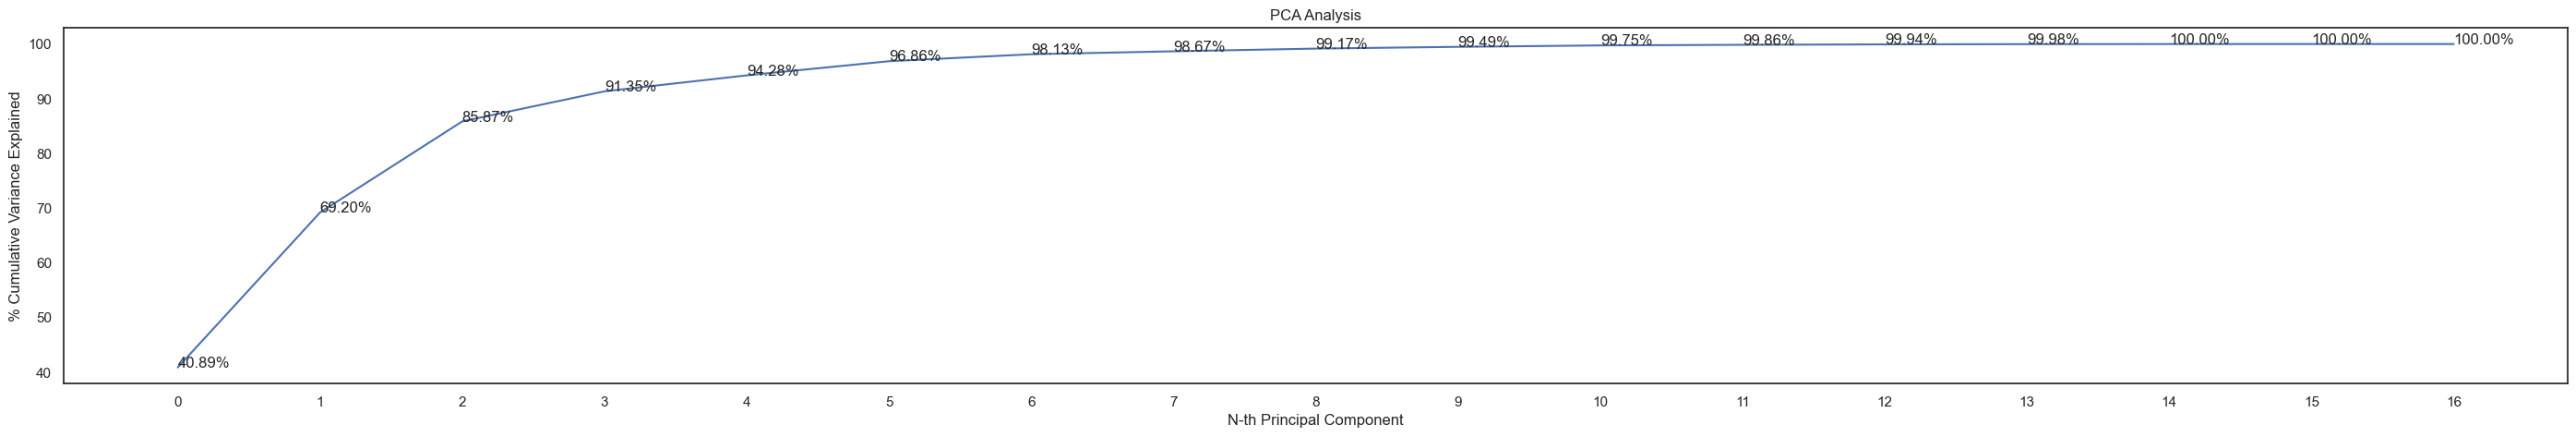

In [53]:
sns.set_style('white')

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')
plt.xticks(np.arange(0,total_components,1))
#ax = plt.axes()
#ax.xaxis.grid()

labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(total_components):
  plt.text(i,labels[i],str(format(labels[i],'.2f'))+'%')

Podemos observar el porcentaje de varianza que se explica por cada componente principal. En nuestro caso el componente principal #5 explica más del 98% de varianza de los datos y es el que vamos a ocupar

In [54]:
for i in range(0, total_components):
  print("The percentage of variance explained by principal component", i+1, "is", format(pca.explained_variance_ratio_[i]*100,'.2f'),'%')

The percentage of variance explained by principal component 1 is 40.89 %
The percentage of variance explained by principal component 2 is 28.31 %
The percentage of variance explained by principal component 3 is 16.66 %
The percentage of variance explained by principal component 4 is 5.49 %
The percentage of variance explained by principal component 5 is 2.92 %
The percentage of variance explained by principal component 6 is 2.59 %
The percentage of variance explained by principal component 7 is 1.27 %
The percentage of variance explained by principal component 8 is 0.54 %
The percentage of variance explained by principal component 9 is 0.50 %
The percentage of variance explained by principal component 10 is 0.32 %
The percentage of variance explained by principal component 11 is 0.26 %
The percentage of variance explained by principal component 12 is 0.11 %
The percentage of variance explained by principal component 13 is 0.08 %
The percentage of variance explained by principal compone

Importante, antes de concatenar el nuevo dataframe con las variables transformadas, escaladas y analizadas con PCA, vamos a separar la variable de salida (DIAS_ALMONEDA) sin las transformaciones y escalamiento, ya que es importante por temas de interpretabilidad conservar la variable en sus unidades originales que son días

In [55]:
y= df['DIAS_ALMONEDA']

#**Conjuntar en un dataframe con transformaciones, escalamiento y PCA**

In [56]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import os

# Aplicar PCA
n = 5  # Número de componentes principales
pca = PCA(n_components=5)
minmax_df_projected = pca.fit_transform(minmax_df)
# Crear DataFrame con las componentes principales
pca_df = pd.DataFrame(minmax_df_projected, columns=[f"PC{i}" for i in range(1, n + 1)], index=minmax_df.index)

# Eliminar NaNs en PCA
pca_df_clean = pca_df.dropna()

# Alinear índices entre todos los DataFrames restantes
pca_df_clean = pca_df_clean.reset_index(drop=True)
binary_df = binary_df.reset_index(drop=True)
onehot_df = onehot_df.reset_index(drop=True)
y = y.reset_index(drop=True)

# Concatenar todos los datos
X_final = pd.concat([pca_df_clean, onehot_df, binary_df], axis=1)
df_final = pd.concat([X_final, y.reset_index(drop=True)], axis=1)

# Guardar archivo resultante
output_path = r"C:\Users\david\GitRepo\modelo-ventas-nmp\data\raw\PCA_Adjusted_V2.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df_final.to_csv(output_path, index=False)

**Conclusiones**

La fase de preparación de los datos representó un paso fundamental dentro del enfoque metodológico CRISP-ML, ya que permitió transformar el conjunto original en una versión más limpia, estructurada y adecuada para su posterior modelado. Este proceso incluyó tareas clave como la imputación de valores faltantes, la transformación de variables numéricas mediante técnicas logarítmicas y la codificación de variables categóricas utilizando One-Hot Encoding. Estas acciones optimizaron la representación del dataset sin comprometer su valor analítico.

Además, se realizó un análisis de correlaciones para detectar relaciones lineales fuertes entre variables numéricas, lo que facilitó la identificación de atributos redundantes y contribuyó a una selección de características más informada. Como complemento, se aplicó Análisis de Componentes Principales (PCA) como estrategia de reducción de dimensionalidad, con el objetivo de conservar la mayor parte de la varianza en un conjunto reducido de componentes representativos.

Tras evaluar los primeros resultados del baseline, se tomó la decisión de regresar a la fase de ingeniería de características para realizar un refinamiento adicional. En esta iteración, se seleccionó un subconjunto específico de datos centrado en el ramo de alhajas, lo cual permitió trabajar con un nicho más homogéneo y con menor ruido, elevando así la capacidad predictiva del modelo.

Asimismo, se implementaron ajustes cruciales como la eliminación de variables irrelevantes, la reducción de columnas y filas sin valor informativo y, sobre todo, la prevención de data leakage al excluir la variable objetivo de transformaciones como PCA. Estos refinamientos fueron esenciales para asegurar que los modelos desarrollados fueran no solo más eficientes, sino también más robustos y generalizables, en concordancia con los objetivos del ciclo de vida del aprendizaje automático propuesto por CRISP-ML.
